# House Price Project

## Past Work

In [3]:
import pandas
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
import warnings

In [4]:
df = pandas.read_csv("revised_training_data.csv")
df2 = pandas.read_csv("revised_testing_data.csv")
X = df.drop('SalePrice',axis=1).drop('Id',axis=1)  # Features
y = df['SalePrice']  # Output

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

# Standardize the data:
# (x-avg(x))/std(x)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     98.70
Date:                Wed, 01 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:06:27   Log-Likelihood:                -17178.
No. Observations:                1460   AIC:                         3.451e+04
Df Residuals:                    1382   BIC:                         3.492e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.558e+

In [7]:
def convert_to_log_train(variable):
    variable = np.log(df[df[variable] > 0][variable])
    #plt.hist(variable)

In [8]:
convert_to_log_train("LotArea")
convert_to_log_train("TotalBsmtSF")
convert_to_log_train("MasVnrArea")
convert_to_log_train("1stFlrSF")
convert_to_log_train("2ndFlrSF")
convert_to_log_train("GrLivArea")
convert_to_log_train("TotRmsAbvGrd")
convert_to_log_train("WoodDeckSF")
convert_to_log_train("ScreenPorch")

In [11]:
def convert_to_log_test(variable):
    variable = np.log(df2[df2[variable] > 0][variable])
    #plt.hist(variable)

In [13]:
convert_to_log_test("LotArea")
convert_to_log_test("TotalBsmtSF")
convert_to_log_test("MasVnrArea")
convert_to_log_test("1stFlrSF")
convert_to_log_test("2ndFlrSF")
convert_to_log_test("GrLivArea")
convert_to_log_test("TotRmsAbvGrd")
convert_to_log_test("WoodDeckSF")
convert_to_log_test("ScreenPorch")

In [15]:
model = sm.OLS(y, X).fit()

predicted_values = model.predict()

residuals = y - predicted_values

RSS = np.sum(residuals**2)

print("Residual Sum of Squares (RSS):", RSS)

Residual Sum of Squares (RSS): 1417232174089.1006


In [17]:
RMSE = np.sqrt(mean_squared_error(y, predicted_values))
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 31156.170633667072


In [19]:
X = df.drop(['SalePrice', 'Id', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath', 'MoSold', 'YrSold',
             'MSZoning_encoded', 'Alley_encoded', 'HouseStyle_encoded',
             'Heating_encoded', 'FireplaceQu_encoded', 'GarageType_encoded',
             'PavedDrive_encoded', 'PoolArea', '3SsnPorch', 'MiscVal'], axis=1)

print("Remaining columns in X:")
print(X.columns)

Remaining columns in X:
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       'Street_encoded', 'LotShape_encoded', 'LandContour_encoded',
       'Utilities_encoded', 'LotConfig_encoded', 'LandSlope_encoded',
       'Neighborhood_encoded', 'Condition1_encoded', 'Condition2_encoded',
       'BldgType_encoded', 'RoofStyle_encoded', 'RoofMatl_encoded',
       'Exterior1st_encoded', 'Exterior2nd_encoded', 'MasVnrType_encoded',
       'ExterQual_encoded', 'ExterCond_encoded', 'Foundation_encoded',
       'BsmtQual_encoded', 'BsmtCond_encoded', 'BsmtExposure_encoded',
       'BsmtFinType1_encoded', 'Bsmt

In [21]:
X_2 = df2.drop(['Id', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath', 'MoSold', 'YrSold',
             'MSZoning_encoded', 'Alley_encoded', 'HouseStyle_encoded',
             'Heating_encoded', 'FireplaceQu_encoded', 'GarageType_encoded',
             'PavedDrive_encoded', 'PoolArea', '3SsnPorch', 'MiscVal'], axis=1)

print("Remaining columns in X_2:")
print(X_2.columns)

Remaining columns in X_2:
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       'Street_encoded', 'LotShape_encoded', 'LandContour_encoded',
       'Utilities_encoded', 'LotConfig_encoded', 'LandSlope_encoded',
       'Neighborhood_encoded', 'Condition1_encoded', 'Condition2_encoded',
       'BldgType_encoded', 'RoofStyle_encoded', 'RoofMatl_encoded',
       'Exterior1st_encoded', 'Exterior2nd_encoded', 'MasVnrType_encoded',
       'ExterQual_encoded', 'ExterCond_encoded', 'Foundation_encoded',
       'BsmtQual_encoded', 'BsmtCond_encoded', 'BsmtExposure_encoded',
       'BsmtFinType1_encoded', 'Bs

In [23]:
columns = X.columns
count = 0

for i in columns:
    count += 1

print("# of predictors:", count)

# of predictors: 64


In [25]:
columns = X_2.columns
count = 0

for i in columns:
    count += 1

print("# of predictors:", count)

# of predictors: 64


In [27]:
#(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=400, random_state=0)

model_combined = LinearRegression()
model_combined.fit(X, y)

y_pred_combined = model_combined.predict(X)

mse_combined = mean_squared_error(y, y_pred_combined)

print(f"MSE on testing data when both testing and training data are combined: {mse_combined}")

MSE on testing data when both testing and training data are combined: 974547908.7344137


In [29]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=400, random_state=0)

model_train_only = LinearRegression()
model_train_only.fit(X_train, y_train)

y_pred_test_only = model_train_only.predict(X_test)

mse_test_train = mean_squared_error(y_test, y_pred_test_only)

print(f"MSE on testing data when only training data is used: {mse_test_train}")

MSE on testing data when only training data is used: 2166636080.076792


In [31]:
# The MSE on the testing data from simple validation is much greater in mse_test_train than mse_combined.
difference_between_mse = mse_test_train-mse_combined
print(f"The difference between the mean square errors is {difference_between_mse}")

The difference between the mean square errors is 1192088171.3423781


In [33]:
model_train = LinearRegression()
model_train.fit(X, y)

y_testing = model_train_only.predict(X_2)

print(type(y_testing))

<class 'numpy.ndarray'>


## Regularization

In [36]:
def evaluate_l1_ratio(X_train, y_train, X_test, y_test, l1_ratio):
    model = ElasticNet(alpha=0.1, l1_ratio = l1_ratio)
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)  # Calculate MSE for training data
    mse_test = mean_squared_error(y_test, y_pred_test)  # Calculate MSE for test data
    r2_train = r2_score(y_train, y_pred_train)  # Calculate R2 score for training data
    r2_test = r2_score(y_test, y_pred_test)  # Calculate R2 score for test data
    
    return mse_train, mse_test, r2_train, r2_test

In [38]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=400, random_state=0)
warnings.filterwarnings('ignore')

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []
l1_ratios = []

l1_ratio = 0.0
while l1_ratio <= 1.0:
    mse_train, mse_test, r2_train, r2_test = evaluate_l1_ratio(X_train, y_train, X_test, y_test, l1_ratio)
    train_mse.append(mse_train)
    test_mse.append(mse_test)
    train_r2.append(r2_train)
    test_r2.append(r2_test)
    l1_ratios.append(l1_ratio)
    l1_ratio += 0.1

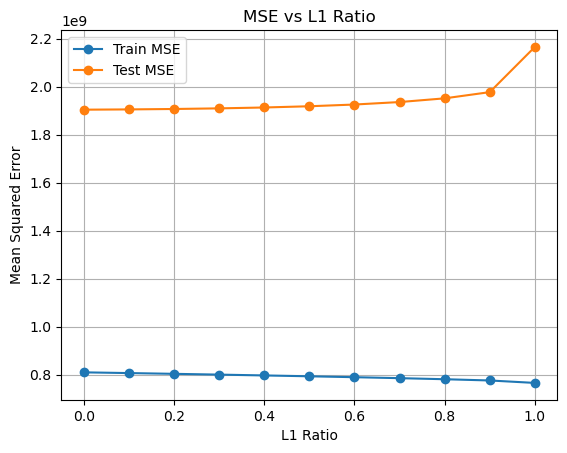

In [39]:
plt.plot(l1_ratios, train_mse, label='Train MSE', marker='o')
plt.plot(l1_ratios, test_mse, label='Test MSE', marker='o')
plt.xlabel('L1 Ratio')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs L1 Ratio')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [44]:
y_pred = model.predict(X_test)

mse_test_train = mean_squared_error(y_test, y_pred)

print(f"{mse_test_train}")
# Mean for X_test and y_test

1918685086.754377


In [46]:
def evaluate_alpha(X_train, y_train, X_test, y_test, alpha):
    elastic_net = ElasticNet(alpha = alpha, l1_ratio=0.5, random_state=0)
    elastic_net.fit(X_train, y_train)

    y_pred_train = elastic_net.predict(X_train)
    y_pred_test = elastic_net.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)  # Calculate MSE for training data
    mse_test = mean_squared_error(y_test, y_pred_test)  # Calculate MSE for test data
    r2_train = r2_score(y_train, y_pred_train)  # Calculate R2 score for training data
    r2_test = r2_score(y_test, y_pred_test)  # Calculate R2 score for test data
    
    return mse_train, mse_test, r2_train, r2_test

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=400, random_state=0)
warnings.filterwarnings('ignore')

train_mse = []
test_mse = []
train_r2 = []
test_r2 = []
alphas = []

alpha = 0.0
while alpha <= 1.0:
    mse_train, mse_test, r2_train, r2_test = evaluate_alpha(X_train, y_train, X_test, y_test, alpha)
    train_mse.append(mse_train)
    test_mse.append(mse_test)
    train_r2.append(r2_train)
    test_r2.append(r2_test)
    alphas.append(alpha)
    alpha += 0.1

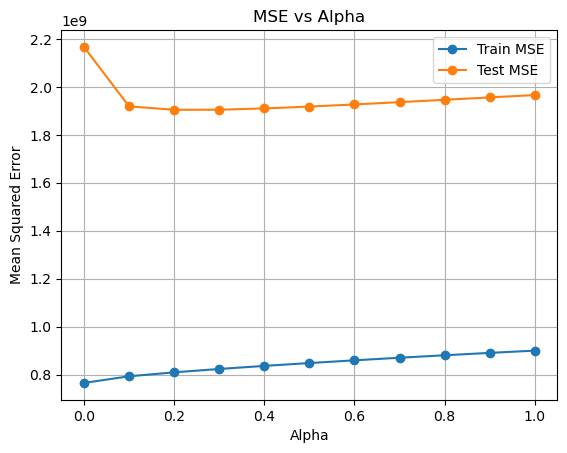

In [49]:
plt.plot(l1_ratios, train_mse, label='Train MSE', marker = 'o')
plt.plot(l1_ratios, test_mse, label='Test MSE', marker = 'o')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Alpha')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
y_pred = model.predict(X_test)

mse_test_train = mean_squared_error(y_test, y_pred)

print(f"{mse_test_train}")
# Mean for X_test and y_test

1918685086.754377


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=400, random_state=0)
#warnings.filterwarnings('ignore')

alphas = np.logspace(-4, 4, 10)
l1_ratios = np.linspace(0, 1, 10)

best_alpha = 0
best_l1_ratio = 0
best_mse = float('inf') # Assumes value is infinity.

for alpha in alphas:
    for l1_ratio in l1_ratios:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        '''if alpha == 0:
            best_mse = mse'''
        if mse < best_mse:
            best_mse = mse
            best_alpha = alpha
            best_l1_ratio = l1_ratio

print(f"Best alpha: {best_alpha}")
print(f"Best l1_ratio: {best_l1_ratio}")
print(f"Best MSE: {best_mse}")

Best alpha: 0.3593813663804626
Best l1_ratio: 0.6666666666666666
Best MSE: 1903579414.4782434


In [55]:
model = ElasticNet(alpha=0.3593813663804626, l1_ratio=0.6666666666666666, max_iter=10000)
model.fit(X, y)

y_testing2 = model.predict(X_2)

Id = 1461
y_testing_list = y_testing2.tolist()